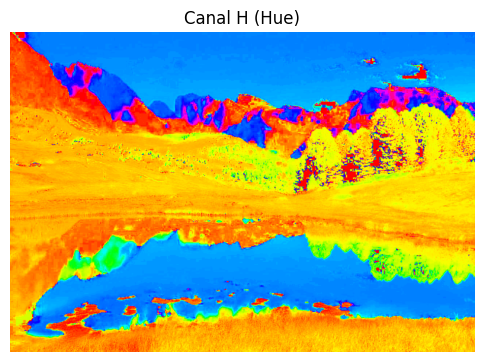

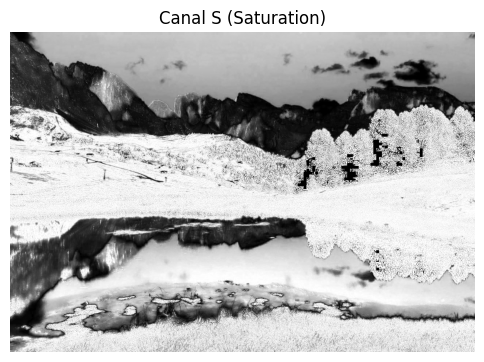

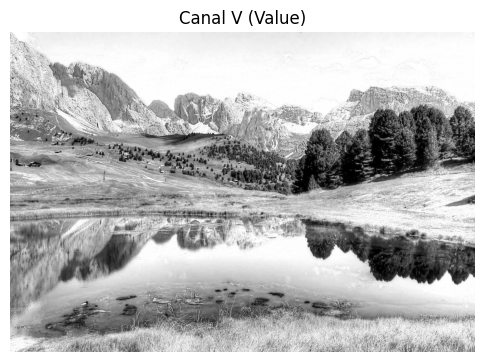

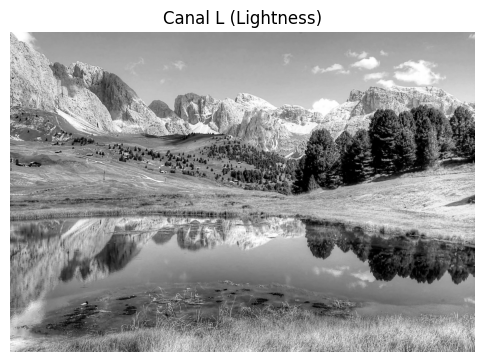

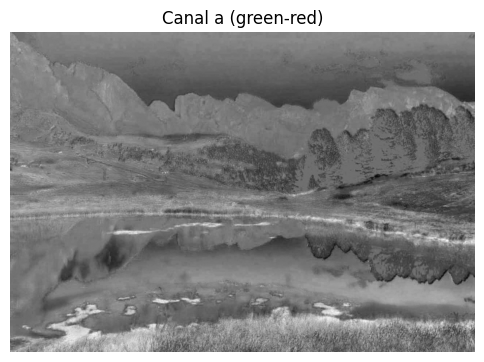

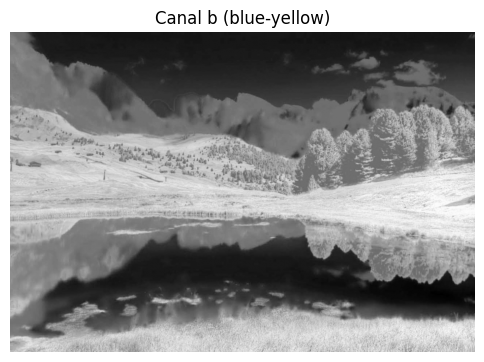

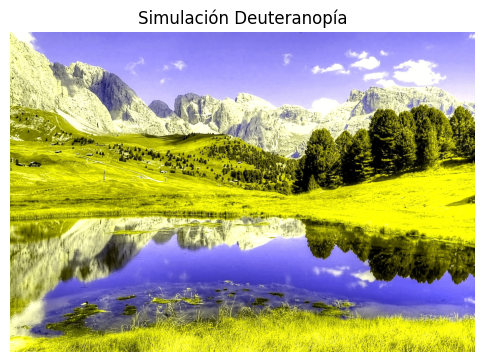

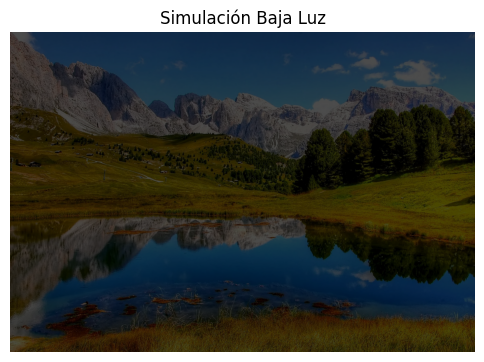

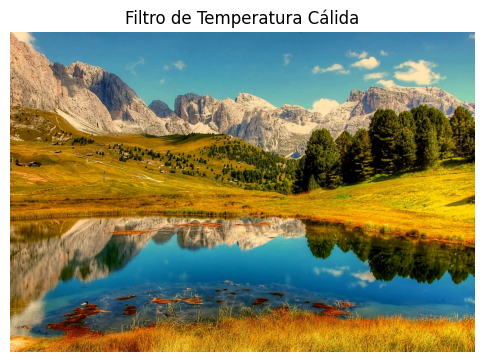

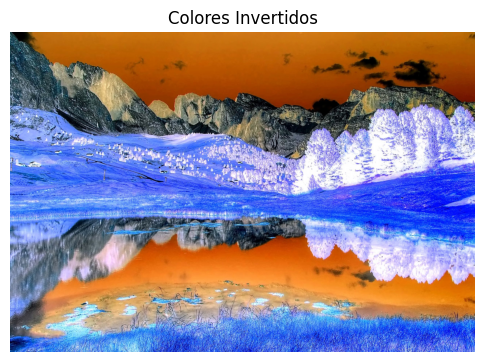

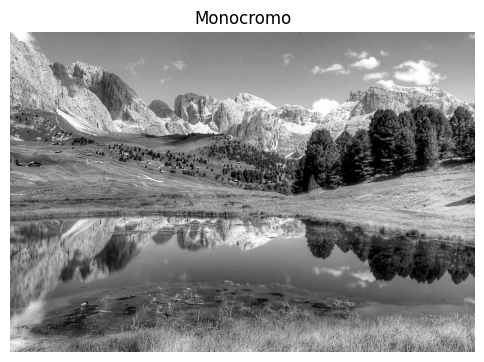

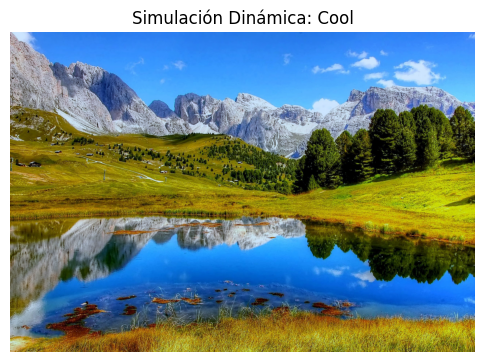

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from PIL import Image
import os

img_bgr = cv2.imread("sample_image.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

def show_image(img, title="Image", cmap=None):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis("off")
    plt.show()

img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2Lab)

h, s, v = cv2.split(img_hsv)
l, a, b = cv2.split(img_lab)

show_image(h, "Canal H (Hue)", cmap='hsv')
show_image(s, "Canal S (Saturation)", cmap='gray')
show_image(v, "Canal V (Value)", cmap='gray')

show_image(l, "Canal L (Lightness)", cmap='gray')
show_image(a, "Canal a (green-red)", cmap='gray')
show_image(b, "Canal b (blue-yellow)", cmap='gray')

def simulate_deuteranopia(img_rgb):
    transformation_matrix = np.array([
        [0.625, 0.7,   0],
        [0.7,   0.625, 0],
        [0,     0,     1]
    ])
    img_arr = img_rgb / 255.0
    img_sim = np.dot(img_arr, transformation_matrix.T)
    img_sim = np.clip(img_sim, 0, 1)
    return (img_sim * 255).astype(np.uint8)

img_deut = simulate_deuteranopia(img_rgb)
show_image(img_deut, "Simulación Deuteranopía")

def simulate_low_light(img_rgb, factor=0.3):
    return np.clip(img_rgb * factor, 0, 255).astype(np.uint8)

img_dark = simulate_low_light(img_rgb)
show_image(img_dark, "Simulación Baja Luz")

def apply_color_temperature(img_rgb, kelvin=4000):
    if kelvin < 5000:
        scale = [1.0, 0.9, 0.7]
    else:
        scale = [0.8, 0.9, 1.0]
    adjusted = img_rgb * scale
    return np.clip(adjusted, 0, 255).astype(np.uint8)

img_warm = apply_color_temperature(img_rgb, kelvin=3500)
show_image(img_warm, "Filtro de Temperatura Cálida")

def invert_colors(img_rgb):
    return 255 - img_rgb

img_inverted = invert_colors(img_rgb)
show_image(img_inverted, "Colores Invertidos")

def to_grayscale(img_rgb):
    return cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

img_gray = to_grayscale(img_rgb)
show_image(img_gray, "Monocromo", cmap='gray')

def simulate(img_rgb, mode="normal"):
    if mode == "deuteranopia":
        return simulate_deuteranopia(img_rgb)
    elif mode == "dark":
        return simulate_low_light(img_rgb)
    elif mode == "warm":
        return apply_color_temperature(img_rgb, kelvin=3500)
    elif mode == "cool":
        return apply_color_temperature(img_rgb, kelvin=6500)
    elif mode == "invert":
        return invert_colors(img_rgb)
    elif mode == "gray":
        return to_grayscale(img_rgb)
    else:
        return img_rgb

demo = simulate(img_rgb, mode="cool")
show_image(demo, "Simulación Dinámica: Cool")
